In [1]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [2]:
path = '/Users/arushigupta/Desktop/Projects/Malaria/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [3]:
# Storing the path of the extracted "train" folder 
train_dir = '/Users/arushigupta/Desktop/Projects/Malaria/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [4]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       
    
# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [5]:
# Storing the path of the extracted "test" folder 
test_dir = '/Users/arushigupta/Desktop/Projects/Malaria/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [6]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [7]:
# Shape of images
test_images.shape
train_images.shape

(24958, 64, 64, 3)

In [8]:
# Shape of labels
test_labels.shape
train_labels.shape

(24958,)

In [9]:
train_min = np.min(train_images)
train_max = np.max(train_images)

test_min = np.min(test_images)
test_max = np.max(test_images)

print("Train Data - Min:", train_min, " Max:", train_max)
print("Test Data - Min:", test_min, " Max:", test_max)

Train Data - Min: 0  Max: 255
Test Data - Min: 0  Max: 255


In [10]:
train_images = (train_images / 255.0).astype('float32')
test_images = (test_images / 255.0).astype('float32')

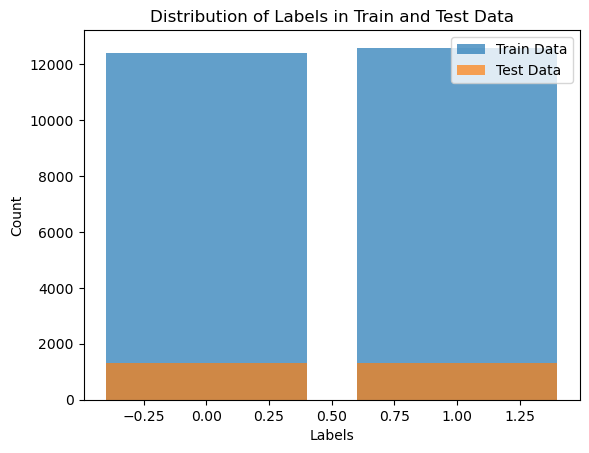

In [11]:
unique_train_labels, counts_train = np.unique(train_labels, return_counts=True)
unique_test_labels, counts_test = np.unique(test_labels, return_counts=True)

plt.bar(unique_train_labels, counts_train, label='Train Data', alpha=0.7)
plt.bar(unique_test_labels, counts_test, label='Test Data', alpha=0.7)

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in Train and Test Data')
plt.legend()
plt.show()

### <b>Data Exploration</b>
Let's visualize the images from the train data

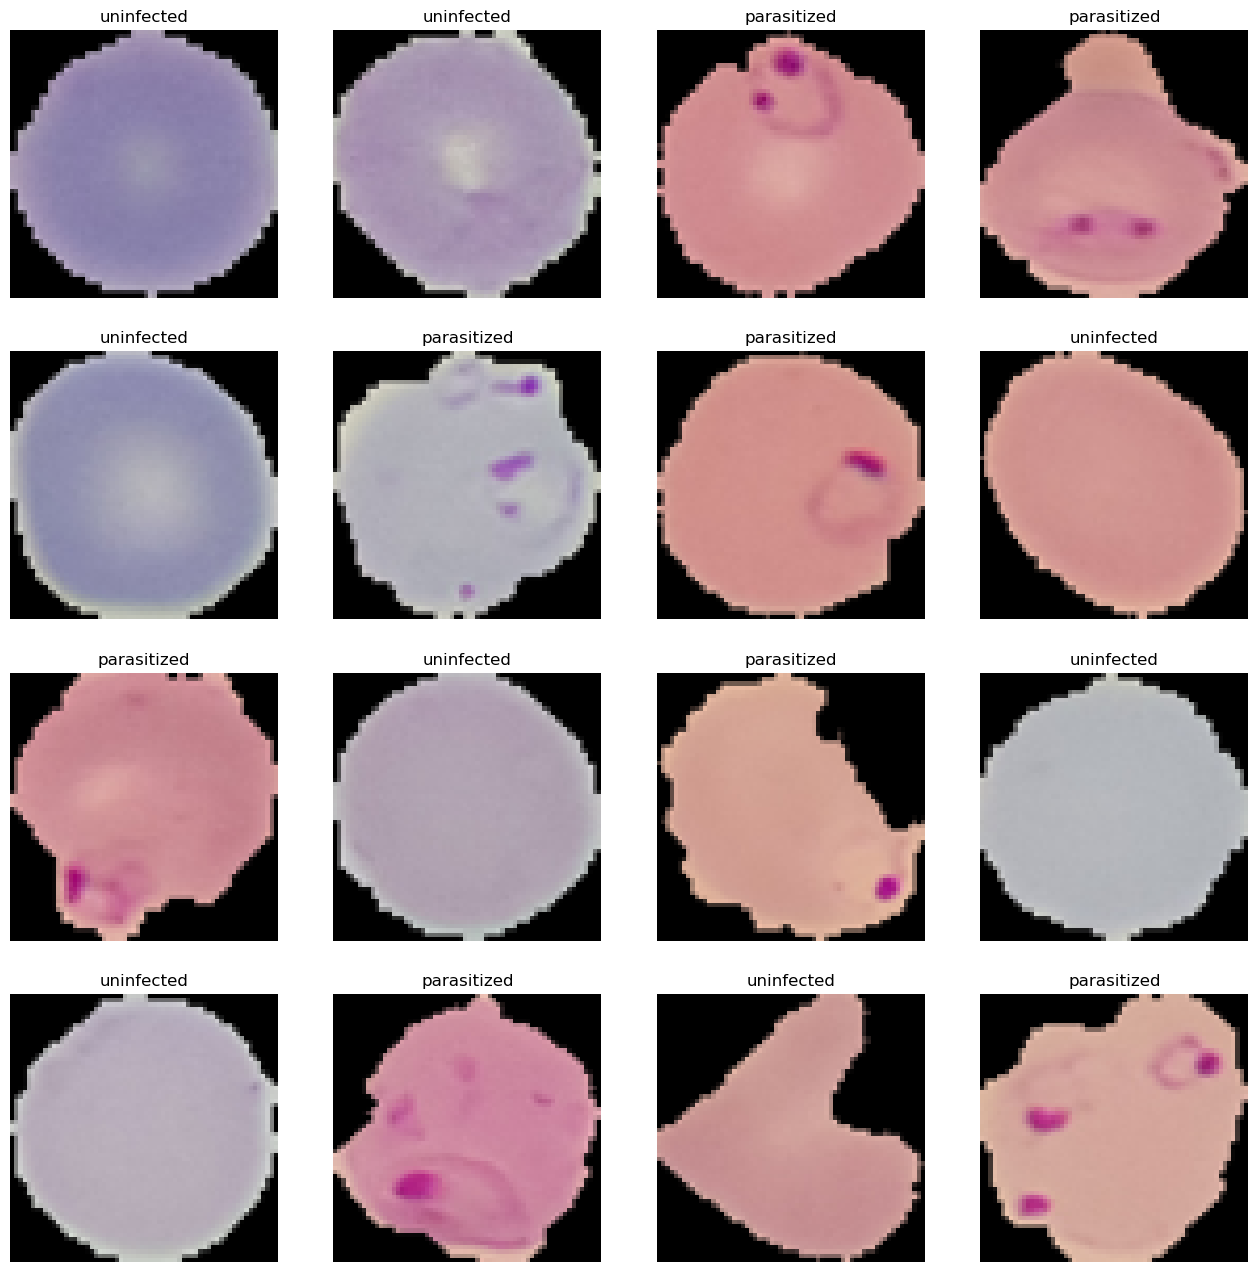

In [12]:
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

In [13]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

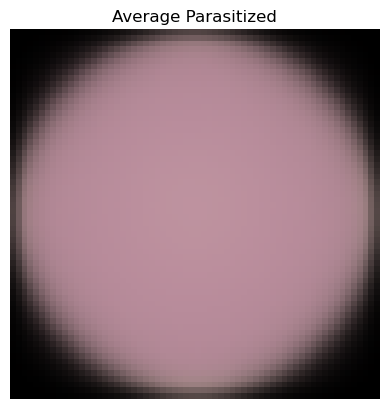

In [14]:
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized') 

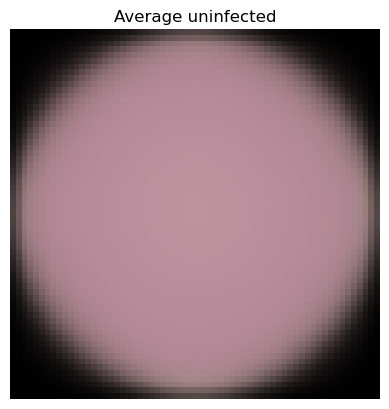

In [15]:
uninfected_data = []  # Create a list to store the uninfected

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')

In [16]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


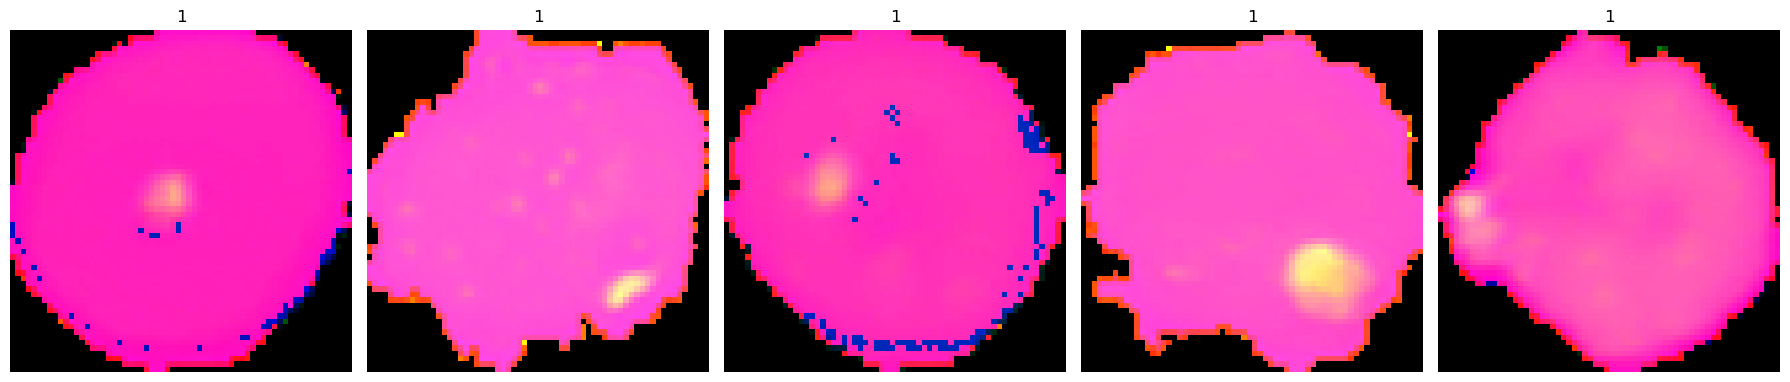

In [17]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


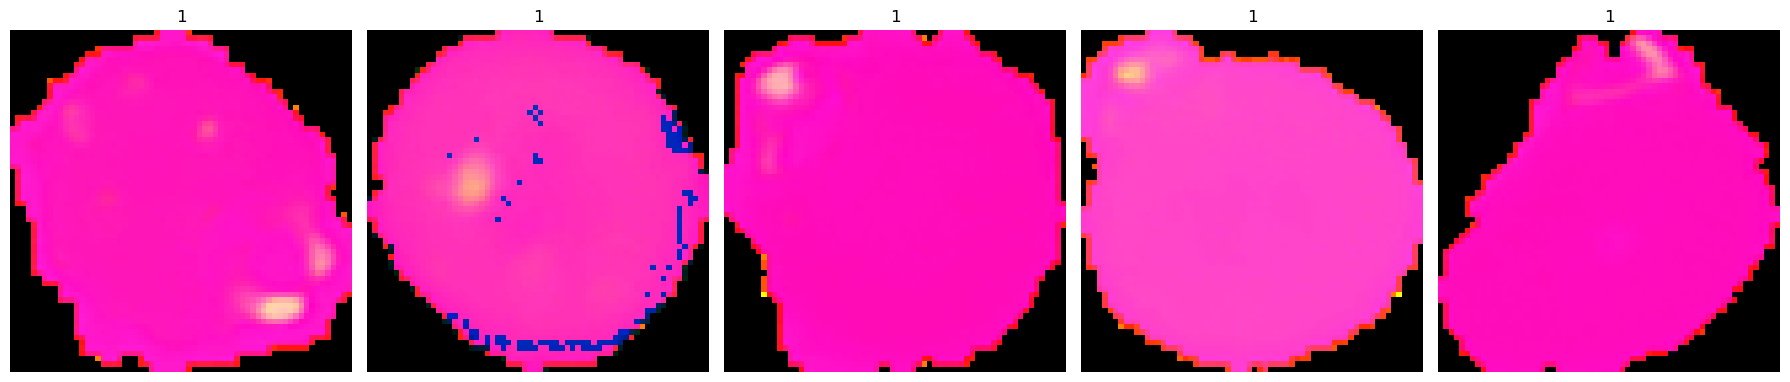

In [18]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

In [19]:
#Gaussian Blurring on train data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

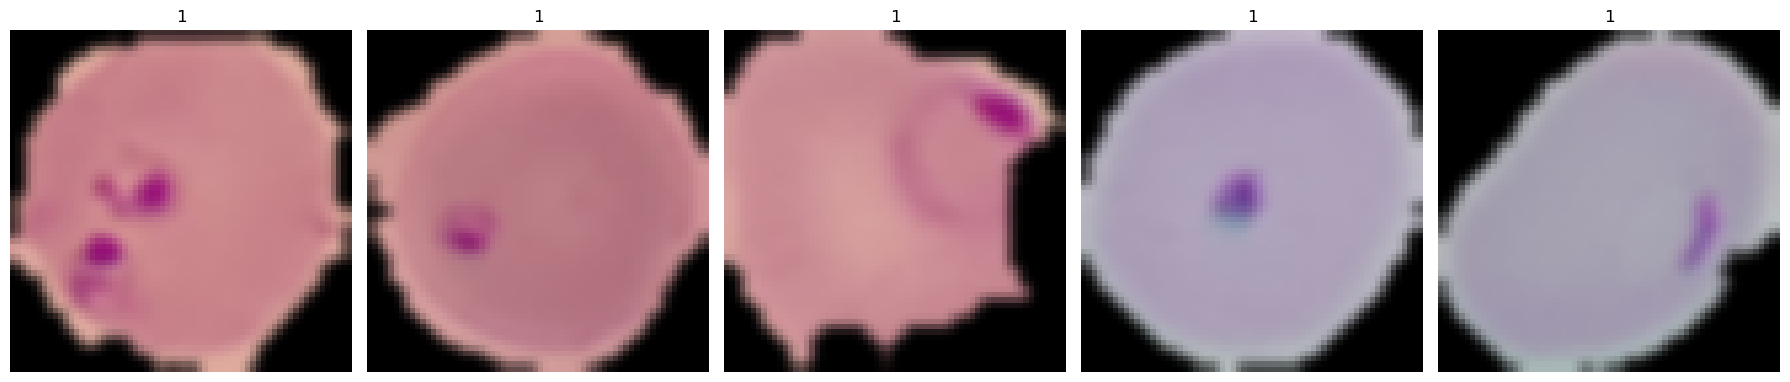

In [20]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

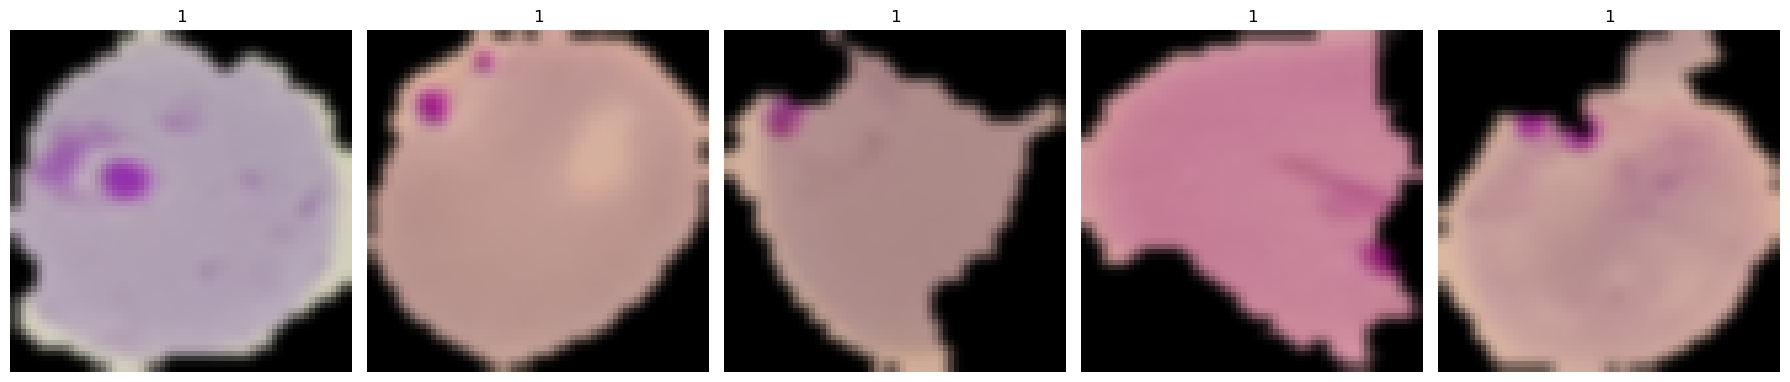

In [21]:
# Gaussian Blurring on test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

In [ ]:
from keras.utils import to_categorical

# Assuming train_labels and test_labels are your original binary labels
# Replace ____ and _____ with your actual variable names

# Encoding Train Labels
train_labels_encoded = to_categorical(train_labels, 2)

# Encoding Test Labels
test_labels_encoded = to_categorical(test_labels, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
#Creating Model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             #ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Example output layer for two classes
model.add(Dense(2, activation='softmax'))
from keras.utils import to_categorical

# Assuming train_labels and test_labels are your original labels
train_labels_encoded = to_categorical(train_labels, num_classes=2)



In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

In [ ]:
plot_accuracy(history)

In [ ]:
### Model 2 with Batch Normalization

In [ ]:
backend.clear_session() 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.01))  # You can adjust the 'alpha' parameter according to your preference

# Add more layers as needed

adam = optimizers.Adam(learning_rate=0.001)

model2.summary()



In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the file path for saving checkpoints
checkpoint_path = 'model2_checkpoint.h5'

# Create ModelCheckpoint callback to save the best weights during training
model_checkpoint = ModelCheckpoint(checkpoint_path, 
                                   monitor='val_loss', 
                                   save_best_only=True, 
                                   mode='min', 
                                   verbose=1)

# Create EarlyStopping callback to stop training if the model does not improve after patience epochs
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5,  # You can adjust the patience parameter
                               mode='min', 
                               verbose=1)

# Add these callbacks while fitting your model
history = model2.fit(train_data, 
                     epochs=epochs, 
                     validation_data=val_data, 
                     callbacks=[model_checkpoint, early_stopping])

# After training, you can load the best weights using the following code
model2.load_weights(checkpoint_path)


In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model using model2.fit(...)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
accuracy = model2.evaluate(test_data, test_labels, verbose=1)

print('\n', 'Test Accuracy:', accuracy[1])

In [ ]:
test_data = ...
test_labels = ...

# Assuming your model is a binary classification model
pred = model2.predict(test_data)
pred = np.argmax(pred, axis=1)

y_true = np.argmax(test_labels, axis=1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
Replace 'test_data' and 'test_labels' with the actual test data and labels that you have. This code will print a classification report and plot a confusion matrix heatmap for your model's predictions.







In [ ]:
###Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have train_images, train_labels as your original data
# Replace 'train_images' and 'train_labels' with your actual data

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.5, rotation_range=30)
val_datagen = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size=64, seed=42, shuffle=True)

# Flowing validation images using val_datagen generator
val_generator = val_datagen.flow(x=X_val, y=y_val, batch_size=64, seed=42, shuffle=True)


In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

In [ ]:
#Pre-trained model (VGG16)

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

# Print the summary of the VGG16 model
vgg.summary()

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(______, activation = 'softmax')(_____)

model4 = Model(vgg.input, pred) # Initializing the model

In [ ]:
# Compiling the model 

In [ ]:
# Adding Callbacks to the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            __________, ______________,
            epochs = _________,
            callbacks = _____________,
            batch_size = _________,
            validation_split = 0.2,
            verbose = 1
)

In [ ]:
# plotting the accuracies
plot_accuracy(__________)


In [ ]:
# Evaluating the model on test data

In [ ]:
# Plot the confusion matrix and generate a classification report for the model